# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
# print(json.dumps(btc_data, indent=4))

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
# print(json.dumps(eth_data, indent=4))

# Compute current value of my crpto
my_btc_value = my_btc * btc_data["data"]["1"]["quotes"]["CAD"]["price"]
my_eth_value = my_eth * eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44903.86
The current value of your 5.3 ETH is $12616.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-03-21", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
df_ticker

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87   6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97   3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88   4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41   6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77   3786651   
...                           ...       ...       ...     ...       ...   
2023-03-15 04:00:00+00:00   99.43   99.7000   98.8100   99.27  11133655   
2023-03-16 04:00:00+00:00   99.53   99.7200   98.6750   98.88  15219710   
2023-03-17 04:00:00+00:00   99.29   99.8000   99.2100   99.50   8265656   
2023-03-20 04:00:00+00:00   99.73   99.7300   99.0150   99.10   6346444   
2023-03-21 04:00:00+00:00   98.85   99.0300   98.7000   98.80   5266122   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   
...                               ...         ...     ...       ...       ...   
2023-03-15 04:00:00+00:00       46473   99.317925  385.89  389.4900  383.7100   
2023-03-16 04:00:00+00:00       58898   99.040846  386.82  396.4700  386.2900   
2023-03-17 04:00:00+00:00       38984   99.594705  393.22  394.4000  388.5500   
2023-03-20 04:00:00+00:00       27948   99.214330  390.80  394.1700  390.0700   
2023-03-21 04:00:00+00:00       24206   98.828501  397.24  399.4100  395.5800   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956  
...                           ...        ...         ...         ...  
2023-03-15 04:00:00+00:00  389.28  173294525     1334847  387.162754  
2023-03-16 04:00:00+00:00  396.11  143753940      999801  392.990202  
2023-03-17 04:00:00+00:00  389.99  139808159      917926  391.225951  
2023-03-20 04:00:00+00:00  393.74   93055883      725426  392.355333  
2023-03-21 04:00:00+00:00  398.91   89391720      612721  397.090090  

[727 rows x 14 columns]

In [9]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
df_closing_prices.index = df_closing_prices.index.date
# df_closing_prices.head()

# Print AGG and SPY close prices
agg_close_price = df_closing_prices["AGG"][-1]
spy_close_price = df_closing_prices["SPY"][-1]
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.8
Current SPY closing price: $398.91


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19945.50
The current value of your 200 AGG shares is $19760.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = round((my_btc_value + my_eth_value),2)
shares = round((my_spy_value + my_agg_value),2)

financial_assets_data = {
    "amount":{
        "crypto":crypto,
        "shares":shares       
    }
}
# financial_assets_data 

# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets_data)

# Display savings DataFrame
display(df_savings)

,amount
crypto,57520.72
shares,39705.50


array([<AxesSubplot:ylabel='amount'>], dtype=object)

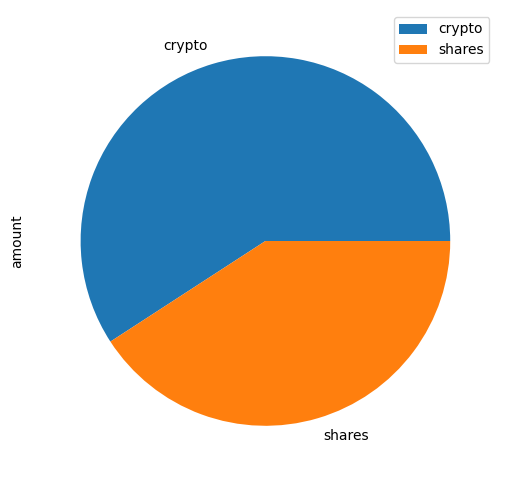

In [12]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True, figsize=(11,6))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

# Calculate total amount of savings
crypto_savings = df_savings.iloc[0,0]
shares_savings = df_savings.iloc[1,0]
total_savings = crypto_savings + shares_savings
print(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulating! You have enough money in emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulating! You have reached your financial goal")
elif total_savings < emergency_fund:
    print(f"You need to input ${round(emergency_fund - total_savings)} to reach your financial goal.")

36000
97226.22
Congratulating! You have enough money in emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-03-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-21', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Display sample data
df_ticker.head()

SPY                                      \
                             open    high     low    close     volume   
timestamp                                                               
2018-03-20 04:00:00+00:00  270.94  271.67  270.18  270.930   60267376   
2018-03-21 04:00:00+00:00  270.90  273.27  270.19  270.400   78884438   
2018-03-22 04:00:00+00:00  267.91  268.87  263.36  263.710  149493729   
2018-03-23 04:00:00+00:00  264.17  265.02  257.83  258.015  183856351   
2018-03-26 04:00:00+00:00  262.13  265.43  259.41  265.140  143141239   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-03-20 04:00:00+00:00      209741  270.907252  106.44  106.51  106.40   
2018-03-21 04:00:00+00:00      330625  271.404380  106.32  106.48  106.08   
2018-03-22 04:00:00+00:00      577825  266.129101  106.67  106.80  106.49   
2018-03-23 04:00:00+00:00      624778  261.280967  106.46  106.70  106.46   
2018-03-26 04:00:00+00:00      450168  262.353110  106.64  106.71  106.47   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2018-03-20 04:00:00+00:00  106.42  3000759       10207  106.449403  
2018-03-21 04:00:00+00:00  106.41  2994423       13898  106.284005  
2018-03-22 04:00:00+00:00  106.61  3334408       13773  106.616043  
2018-03-23 04:00:00+00:00  106.61  3618720       11823  106.607241  
2018-03-26 04:00:00+00:00  106.57  4546535       19722  106.583861

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.6,.4],    #60% stocks(SPY), 40% bonds(AGG)
    num_simulation = 500,
    num_trading_days = 252*30   #a business year has 252 days, forecast 30 years
)
    
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

SPY                                      \
                             open    high     low    close     volume   
timestamp                                                               
2018-03-20 04:00:00+00:00  270.94  271.67  270.18  270.930   60267376   
2018-03-21 04:00:00+00:00  270.90  273.27  270.19  270.400   78884438   
2018-03-22 04:00:00+00:00  267.91  268.87  263.36  263.710  149493729   
2018-03-23 04:00:00+00:00  264.17  265.02  257.83  258.015  183856351   
2018-03-26 04:00:00+00:00  262.13  265.43  259.41  265.140  143141239   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-20 04:00:00+00:00      209741  270.907252          NaN  106.44   
2018-03-21 04:00:00+00:00      330625  271.404380    -0.001956  106.32   
2018-03-22 04:00:00+00:00      577825  266.129101    -0.024741  106.67   
2018-03-23 04:00:00+00:00      624778  261.280967    -0.021596  106.46   
2018-03-26 04:00:00+00:00      450168  262.353110     0.027615  106.64   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2018-03-20 04:00:00+00:00  106.51  106.40  106.42  3000759       10207   
2018-03-21 04:00:00+00:00  106.48  106.08  106.41  2994423       13898   
2018-03-22 04:00:00+00:00  106.80  106.49  106.61  3334408       13773   
2018-03-23 04:00:00+00:00  106.70  106.46  106.61  3618720       11823   
2018-03-26 04:00:00+00:00  106.71  106.47  106.57  4546535       19722   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-20 04:00:00+00:00  106.449403          NaN  
2018-03-21 04:00:00+00:00  106.284005    -0.000094  
2018-03-22 04:00:00+00:00  106.616043     0.001880  
2018-03-23 04:00:00+00:00  106.607241     0.000000  
2018-03-26 04:00:00+00:00  106.583861    -0.000375

In [17]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/vickygao/Desktop/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997235,1.014285,1.000766,0.991802,0.987527,1.000843,1.001599,1.012331,1.002387,0.999086,...,0.989047,1.000182,0.992530,1.006563,1.002163,0.982063,1.003142,1.007553,0.988732,0.995479
2,0.995696,1.014888,1.005086,0.989448,0.988435,1.015951,1.019078,1.008853,1.001340,0.995957,...,0.984051,0.995037,1.003527,0.990603,1.002145,0.976925,1.005337,1.031470,1.012895,0.984213
3,1.000299,1.012217,1.013829,0.991664,0.979196,1.006184,1.023712,1.009179,0.990396,1.004783,...,0.979047,0.990975,0.993158,0.990069,0.994792,0.967551,1.003284,1.033597,1.012397,0.987075
4,0.996287,1.014655,0.996821,0.992686,0.987280,1.001874,1.019006,1.001165,0.992270,1.021316,...,0.980341,0.995389,1.001657,1.005942,0.979630,0.966288,0.989023,1.041844,1.015605,0.997439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.427913,5.243595,3.955946,7.181666,3.063890,1.071460,0.931202,2.301048,7.410475,2.386848,...,4.006767,7.815271,6.895523,13.523915,5.314164,3.907214,9.554728,5.606689,2.904614,4.405148
7557,4.419458,5.251247,3.957075,6.998793,3.064918,1.074945,0.925759,2.287009,7.450236,2.382722,...,4.018883,7.711414,6.936092,13.521637,5.331601,3.917589,9.631294,5.551219,2.922369,4.423666
7558,4.386694,5.240143,3.995739,6.928177,3.018309,1.078043,0.932811,2.284800,7.339325,2.366530,...,3.969737,7.745810,6.979770,13.365309,5.297316,3.977230,9.711621,5.588137,2.920949,4.444862
7559,4.348219,5.225036,3.989769,6.847138,2.943266,1.083063,0.940718,2.256353,7.365874,2.370775,...,3.951364,7.840985,6.924349,13.398876,5.387317,3.934222,9.664024,5.544335,2.932908,4.454020


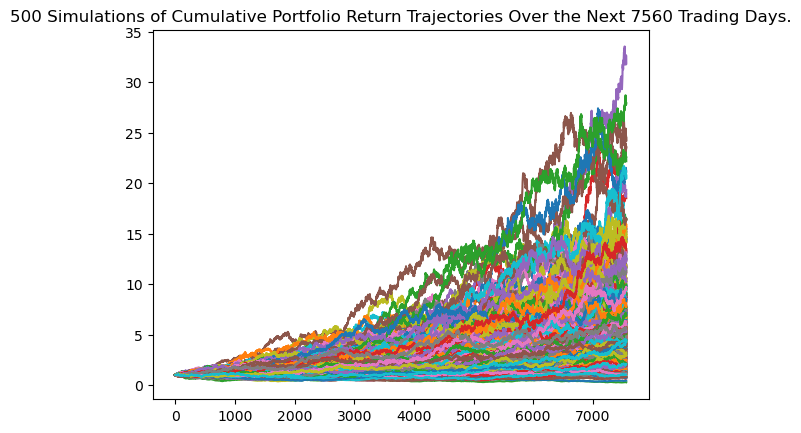

In [18]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()
line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")

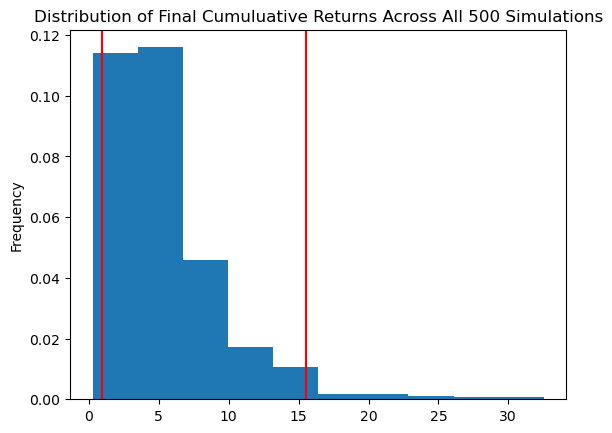

In [19]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.463617
std               4.158668
min               0.275831
25%               2.587228
50%               4.467321
75%               6.810868
max              32.535426
95% CI Lower      0.920381
95% CI Upper     15.535493
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [21]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18407.63 and $310709.86


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [22]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $27611.44 and $466064.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [23]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_five_year.portfolio_data.head()

SPY                                      \
                             open    high     low    close     volume   
timestamp                                                               
2018-03-20 04:00:00+00:00  270.94  271.67  270.18  270.930   60267376   
2018-03-21 04:00:00+00:00  270.90  273.27  270.19  270.400   78884438   
2018-03-22 04:00:00+00:00  267.91  268.87  263.36  263.710  149493729   
2018-03-23 04:00:00+00:00  264.17  265.02  257.83  258.015  183856351   
2018-03-26 04:00:00+00:00  262.13  265.43  259.41  265.140  143141239   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-20 04:00:00+00:00      209741  270.907252          NaN  106.44   
2018-03-21 04:00:00+00:00      330625  271.404380    -0.001956  106.32   
2018-03-22 04:00:00+00:00      577825  266.129101    -0.024741  106.67   
2018-03-23 04:00:00+00:00      624778  261.280967    -0.021596  106.46   
2018-03-26 04:00:00+00:00      450168  262.353110     0.027615  106.64   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2018-03-20 04:00:00+00:00  106.51  106.40  106.42  3000759       10207   
2018-03-21 04:00:00+00:00  106.48  106.08  106.41  2994423       13898   
2018-03-22 04:00:00+00:00  106.80  106.49  106.61  3334408       13773   
2018-03-23 04:00:00+00:00  106.70  106.46  106.61  3618720       11823   
2018-03-26 04:00:00+00:00  106.71  106.47  106.57  4546535       19722   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-20 04:00:00+00:00  106.449403          NaN  
2018-03-21 04:00:00+00:00  106.284005    -0.000094  
2018-03-22 04:00:00+00:00  106.616043     0.001880  
2018-03-23 04:00:00+00:00  106.607241     0.000000  
2018-03-26 04:00:00+00:00  106.583861    -0.000375

In [24]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/vickygao/Desktop/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001179,1.000260,1.008061,0.995741,1.009631,1.000001,1.015876,0.999954,0.984588,1.011896,...,1.001618,0.982618,1.008403,1.002235,0.999670,1.000336,1.001939,0.994917,1.007229,0.998171
2,0.998966,1.006673,1.014088,0.995001,1.014506,1.011458,1.013032,1.004686,0.976850,1.014903,...,1.001079,0.978926,1.000386,1.006423,1.009457,1.001598,1.011886,0.993809,1.011092,0.996728
3,1.000536,1.019936,1.021592,0.999165,1.015712,1.008338,1.017471,1.007203,0.983909,1.009682,...,1.000879,0.965775,1.000193,1.018500,1.013070,0.989352,1.004629,0.999077,1.002210,0.995585
4,1.002106,1.024136,1.020243,0.997128,1.017524,1.004241,1.013480,1.015209,0.993753,1.003835,...,1.001481,0.971781,0.998761,1.024431,1.019008,0.979935,1.004968,0.997076,1.004058,0.988411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.321369,0.920504,1.427058,0.890991,1.463923,1.065509,1.232583,1.924603,0.722630,1.249007,...,1.664640,0.934196,1.521734,1.774551,1.398733,1.146974,0.770314,1.085609,1.122571,1.610268
1257,1.344721,0.918554,1.423665,0.900824,1.463956,1.072570,1.237017,1.963804,0.727140,1.254325,...,1.663844,0.949641,1.523280,1.772649,1.403347,1.127016,0.757390,1.067504,1.139950,1.582999
1258,1.354992,0.929925,1.433044,0.899250,1.484866,1.061992,1.227486,1.959859,0.723888,1.269758,...,1.650572,0.949356,1.527990,1.781010,1.410427,1.135823,0.752051,1.073585,1.130091,1.580928
1259,1.356009,0.925756,1.446277,0.896222,1.494279,1.071104,1.209727,1.973546,0.731611,1.293050,...,1.647995,0.949675,1.533594,1.776179,1.393361,1.142358,0.744915,1.079802,1.135801,1.590469


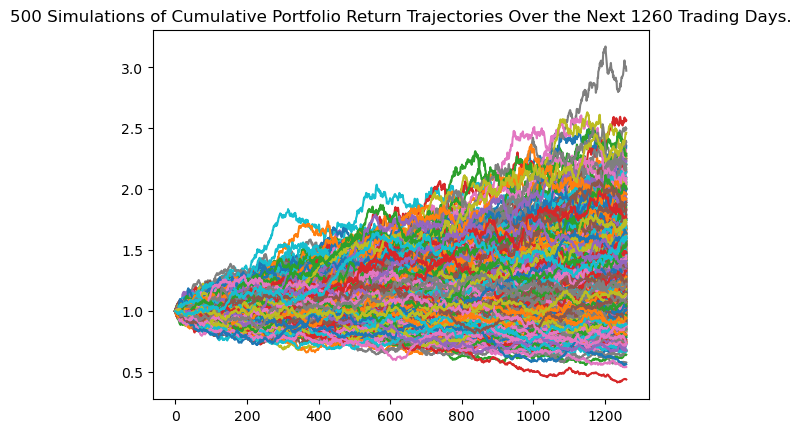

In [25]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()
line_plot.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches="tight")

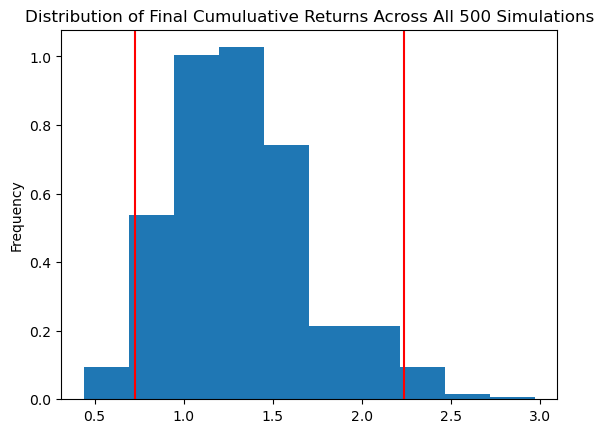

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_five_year_dist_plot.png',bbox_inches='tight')

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.324039
std               0.390062
min               0.440027
25%               1.039479
50%               1.270105
75%               1.544764
max               2.972759
95% CI Lower      0.726677
95% CI Upper      2.238396
Name: 1260, dtype: float64


In [28]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $43600.6 and $134303.73


### Ten Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_ten_year.portfolio_data.head()

SPY                                      \
                             open    high     low    close     volume   
timestamp                                                               
2018-03-20 04:00:00+00:00  270.94  271.67  270.18  270.930   60267376   
2018-03-21 04:00:00+00:00  270.90  273.27  270.19  270.400   78884438   
2018-03-22 04:00:00+00:00  267.91  268.87  263.36  263.710  149493729   
2018-03-23 04:00:00+00:00  264.17  265.02  257.83  258.015  183856351   
2018-03-26 04:00:00+00:00  262.13  265.43  259.41  265.140  143141239   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-20 04:00:00+00:00      209741  270.907252          NaN  106.44   
2018-03-21 04:00:00+00:00      330625  271.404380    -0.001956  106.32   
2018-03-22 04:00:00+00:00      577825  266.129101    -0.024741  106.67   
2018-03-23 04:00:00+00:00      624778  261.280967    -0.021596  106.46   
2018-03-26 04:00:00+00:00      450168  262.353110     0.027615  106.64   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2018-03-20 04:00:00+00:00  106.51  106.40  106.42  3000759       10207   
2018-03-21 04:00:00+00:00  106.48  106.08  106.41  2994423       13898   
2018-03-22 04:00:00+00:00  106.80  106.49  106.61  3334408       13773   
2018-03-23 04:00:00+00:00  106.70  106.46  106.61  3618720       11823   
2018-03-26 04:00:00+00:00  106.71  106.47  106.57  4546535       19722   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-20 04:00:00+00:00  106.449403          NaN  
2018-03-21 04:00:00+00:00  106.284005    -0.000094  
2018-03-22 04:00:00+00:00  106.616043     0.001880  
2018-03-23 04:00:00+00:00  106.607241     0.000000  
2018-03-26 04:00:00+00:00  106.583861    -0.000375

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/vickygao/Desktop/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994153,1.001826,0.995496,0.991973,0.989397,1.006873,1.007331,0.995702,0.999651,1.001199,...,0.996752,1.011848,0.994320,0.990271,0.989165,0.993873,1.001444,0.998141,1.004070,1.009011
2,1.004561,1.011196,0.998033,0.999200,0.976414,1.014953,0.996682,0.989934,0.995685,1.009522,...,0.988193,1.019161,1.006510,0.993099,0.980252,0.997981,0.998319,0.991608,0.994621,0.994782
3,1.002931,0.987372,0.994743,0.984045,0.962768,1.031532,1.008353,1.006329,0.983078,1.024668,...,0.995315,1.024891,1.006502,0.996449,0.978165,1.001876,1.004641,0.986176,0.990904,1.007157
4,1.001363,0.983870,0.988877,0.989932,0.960291,1.028812,1.010132,1.002285,0.974641,1.024125,...,0.992293,1.023435,1.002859,1.003407,0.973291,0.998053,1.004805,0.985643,0.985478,1.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.751647,1.255390,0.925733,1.149235,1.103771,1.811904,0.817910,1.487222,2.195551,0.923649,...,2.093872,1.994356,0.384102,0.673385,1.733564,1.542094,1.072068,1.197889,1.081976,2.730153
2517,0.751198,1.238386,0.916378,1.153932,1.113586,1.825146,0.819488,1.516741,2.219903,0.933840,...,2.080508,2.002934,0.385439,0.680201,1.757549,1.539551,1.073970,1.202705,1.075861,2.741017
2518,0.749519,1.247266,0.903010,1.145473,1.111957,1.817612,0.816078,1.515501,2.223512,0.939232,...,2.110874,2.029908,0.383382,0.679519,1.757314,1.539080,1.078201,1.193087,1.071889,2.723720
2519,0.749166,1.249073,0.897529,1.156208,1.099242,1.791702,0.817353,1.506709,2.195058,0.950296,...,2.095100,2.000069,0.380134,0.679398,1.747335,1.552558,1.066438,1.183877,1.063873,2.761089


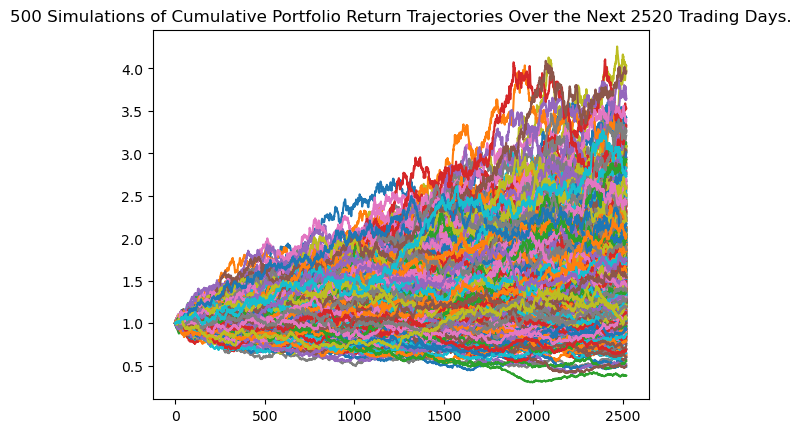

In [31]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()
line_plot.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches="tight")

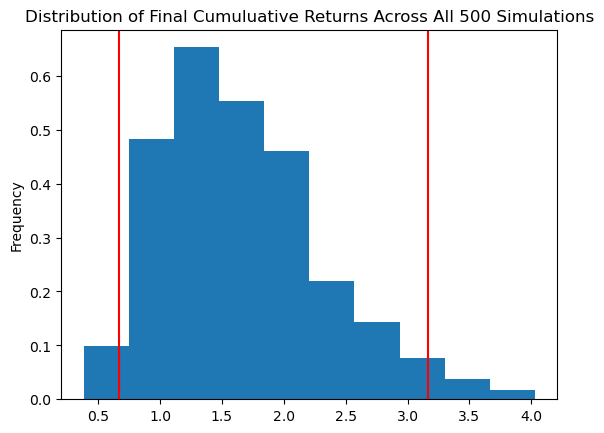

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.659739
std               0.648957
min               0.384605
25%               1.201714
50%               1.551407
75%               2.023748
max               4.029222
95% CI Lower      0.668613
95% CI Upper      3.168162
Name: 2520, dtype: float64


In [34]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $40116.75 and $190089.7
